# Install tensorflow package
!pip install tensorflow

# Install package to work with images
!pip install Pillow

In [1]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]

In [2]:
import tensorflow as tf

In [ ]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

In [3]:
train = tf.keras.utils.image_dataset_from_directory(
    "images",
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  "images",
  subset="validation",
    **args
)

Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.


2022-04-10 19:38:31.431336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 19:38:31.434833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 19:38:31.435101: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 19:38:31.435548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [5]:
first = train.take(1)
first

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [6]:
images, labels = list(first)[0]
first_image = images[0]

tf.Tensor(
[[[ 17.658463  26.107117  18.948654]
  [ 25.686066  24.405075  20.66211 ]
  [ 29.847656  24.580734  21.669708]
  ...
  [124.332245 121.332245 116.332245]
  [122.09987  119.09987  114.09987 ]
  [120.47656  117.47656  112.47656 ]]

 [[ 18.993622  26.708206  22.481903]
  [ 26.17189   26.147278  24.414856]
  [ 29.454437  22.608734  22.083344]
  ...
  [121.059235 118.059235 113.059235]
  [123.12695  120.12695  115.12695 ]
  [121.17383  118.17383  113.17383 ]]

 [[ 17.373474  24.858932  23.791443]
  [ 19.348282  19.05922   20.95375 ]
  [ 25.176407  18.02797   19.969376]
  ...
  [123.03125  120.03125  115.03125 ]
  [124.5918   121.5918   116.5918  ]
  [122.63867  119.63867  114.63867 ]]

 ...

 [[201.       206.       212.      ]
  [202.06966  207.06966  213.06966 ]
  [203.38281  208.38281  214.38281 ]
  ...
  [174.02734  179.02734  185.02734 ]
  [170.61914  175.61914  181.61914 ]
  [168.66602  173.66602  179.66602 ]]

 [[200.33229  205.33229  211.33229 ]
  [201.42969  206.42969  2

In [1]:
first_image[:3,:3,0]

NameError: name 'first_image' is not defined

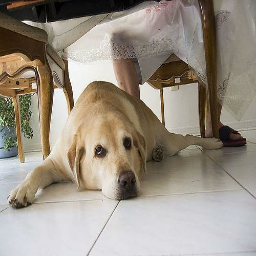

In [8]:
from PIL import Image

Image.fromarray(images[0].numpy().astype("uint8"))

In [7]:
print(labels[0])

tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)


In [9]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
])


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

Epoch 1/5


2022-04-10 19:38:32.645930: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-04-10 19:38:33.259176: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-10 19:38:33.319569: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


24/24 [==============================] - 2s 37ms/step - loss: 26.5262 - accuracy: 0.2578 - val_loss: 5.0710 - val_accuracy: 0.2757
Epoch 2/5
24/24 [==============================] - 1s 26ms/step - loss: 2.5036 - accuracy: 0.3576 - val_loss: 2.0925 - val_accuracy: 0.2865
Epoch 3/5
24/24 [==============================] - 1s 26ms/step - loss: 0.9727 - accuracy: 0.6856 - val_loss: 1.6296 - val_accuracy: 0.3405
Epoch 4/5
24/24 [==============================] - 1s 26ms/step - loss: 0.3407 - accuracy: 0.9555 - val_loss: 1.8717 - val_accuracy: 0.2919
Epoch 5/5
24/24 [==============================] - 1s 26ms/step - loss: 0.0950 - accuracy: 0.9933 - val_loss: 2.1624 - val_accuracy: 0.2865


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134,218,949
Trainable params: 134,218,949
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

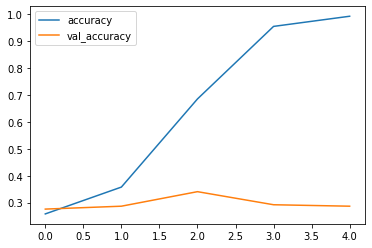

In [14]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

In [15]:
def train_model(network, epochs=5):
    model = Sequential(network)

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [16]:
network = [
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
]

history_df, model = train_model(network)

Epoch 1/5
24/24 [==============================] - 1s 34ms/step - loss: 1.8673 - accuracy: 0.2402 - val_loss: 1.6516 - val_accuracy: 0.2324
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 1.5736 - accuracy: 0.3023 - val_loss: 1.5379 - val_accuracy: 0.3189
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 1.4276 - accuracy: 0.4197 - val_loss: 1.4259 - val_accuracy: 0.3730
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 1.1961 - accuracy: 0.5398 - val_loss: 1.4739 - val_accuracy: 0.3892
Epoch 5/5
24/24 [==============================] - 1s 25ms/step - loss: 0.9572 - accuracy: 0.6383 - val_loss: 1.4686 - val_accuracy: 0.3297


<AxesSubplot:>

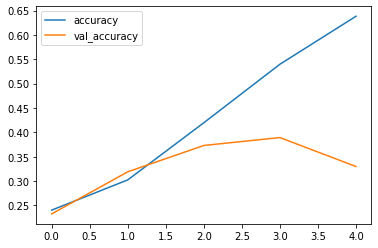

In [17]:
history_df[["accuracy", "val_accuracy"]].plot()

In [18]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", seed=1),
      layers.RandomRotation(0.2, seed=1),
    layers.RandomZoom(0.2, seed=1),
  ]
)


full_network = [
    data_augmentation
] + network

history_df, model = train_model(full_network, epochs=10)

Epoch 1/10
24/24 [==============================] - 1s 30ms/step - loss: 1.4351 - accuracy: 0.4049 - val_loss: 1.3982 - val_accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 1.4111 - accuracy: 0.4265 - val_loss: 1.3633 - val_accuracy: 0.4432
Epoch 3/10
24/24 [==============================] - 1s 27ms/step - loss: 1.3179 - accuracy: 0.4669 - val_loss: 1.3570 - val_accuracy: 0.4108
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 1.2789 - accuracy: 0.4710 - val_loss: 1.3879 - val_accuracy: 0.3946
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 1.2739 - accuracy: 0.4993 - val_loss: 1.4428 - val_accuracy: 0.3622
Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 1.2479 - accuracy: 0.4899 - val_loss: 1.4310 - val_accuracy: 0.3514
Epoch 7/10
24/24 [==============================] - 1s 27ms/step - loss: 1.2293 - accuracy: 0.4980 - val_loss: 1.3773 - val_accuracy: 0.3892
Epoch 8/10
24

<AxesSubplot:>

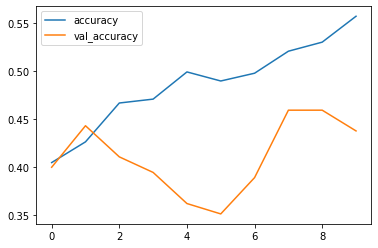

In [19]:
history_df[["accuracy", "val_accuracy"]].plot()

In [20]:
preds = model.predict(test)

In [21]:
import numpy as np
predicted_class = np.argmax(preds, axis=1)

In [22]:
actual_labels = np.concatenate([y for x, y in test], axis=0)

In [23]:
import itertools

actual_image = [x.numpy().astype("uint8") for x, y in test]
actual_image = list(itertools.chain.from_iterable(actual_image))
actual_image = [Image.fromarray(a) for a in actual_image]

In [24]:
actual_class = np.argmax(actual_labels, axis=1)

In [25]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"])

In [26]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: breeds[x])
pred_df["actual"] = pred_df["actual"].apply(lambda x: breeds[x])

,prediction,actual,image
0,siberian_husky,siberian_husky,
1,labrador_retriever,bernese_mountain_dog,
2,bernese_mountain_dog,labrador_retriever,
3,bernese_mountain_dog,labrador_retriever,
4,beagle,beagle,
5,bernese_mountain_dog,labrador_retriever,
6,doberman,doberman,
7,doberman,doberman,
8,doberman,doberman,
9,bernese_mountain_dog,bernese_mountain_dog,

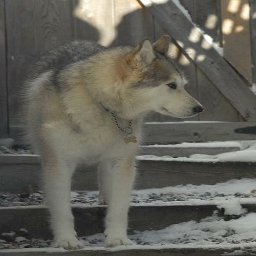
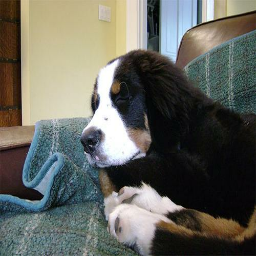
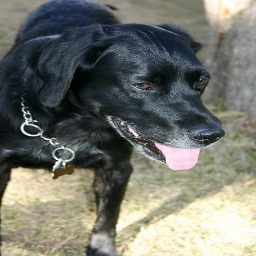
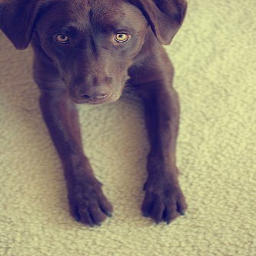
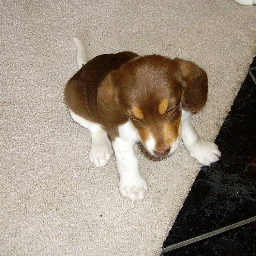
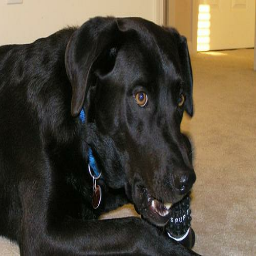
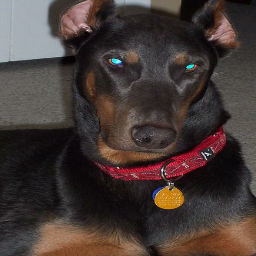
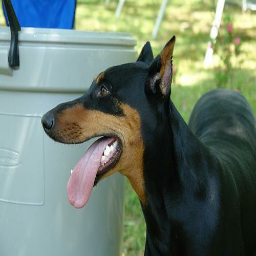
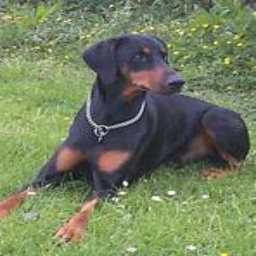
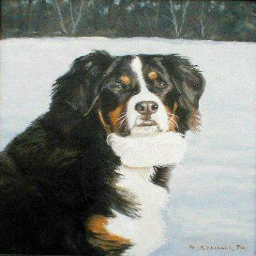

In [27]:
import base64
import io

def image_formatter(img):
    with io.BytesIO() as buffer:
        img.save(buffer, 'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'

pred_df.head(10).style.format({'image': image_formatter})